# Promt:
dataset: 'country_name','year','ln_gdp', 'AI_Doc', 'eco_fre','Institutions_Index', 'Intellectualcapital','Infrastructure',  'DigitalCapacity','DataAvailability',  'trade'
- Describe, Correlation, Covariance
- Time series Data though year, category by country x: variable; y:year
- Multiple Scatter Plot:
    + Python: sns.pairplot(iris, hue="species", height=2.5)
- Multiple Scatter Plot, category by country, highlight top 10 highest country & top 10 lowest country
    + Python: sns.pairplot
- 

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

In [107]:
import os

# Check current working directory and list files
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())

# Update the path to your CSV file as needed
# read_csv = pd.read_csv('data/251006_data.csv')
# df = read_csv
# df.head()

Current working directory: c:\Users\VAQ\OneDrive\Desktop\RP_2 ngươi bạn\C3_Menthology\01_machine learning method\src
Files in current directory: ['EDA.ipynb']


In [108]:
df = pd.read_csv(r'c:\Users\VAQ\OneDrive\Desktop\RP_2 ngươi bạn\C3_Menthology\01_machine learning method\data\251006_data.csv')
df.describe()
df = df[['country_name','year','ln_gdp', 'AI_Doc', 'eco_fre','Institutions_Index', 'Intellectualcapital','Infrastructure',  'DigitalCapacity','DataAvailability',  'trade','infl']]
df.dropna(inplace=True)

In [109]:
print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print("\nBasic Info:")
print(df.info())

print("\n" + "="*80)
print("Summary Statistics:")
print(df.describe())

print("\n" + "="*80)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*80)
print("Data Shape:", df.shape)
print("Number of Countries:", df['country_name'].nunique())
print("Year Range:", df['year'].min(), "-", df['year'].max())



DESCRIPTIVE STATISTICS

Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 1014
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_name         500 non-null    object 
 1   year                 500 non-null    int64  
 2   ln_gdp               500 non-null    float64
 3   AI_Doc               500 non-null    float64
 4   eco_fre              500 non-null    float64
 5   Institutions_Index   500 non-null    float64
 6   Intellectualcapital  500 non-null    float64
 7   Infrastructure       500 non-null    float64
 8   DigitalCapacity      500 non-null    float64
 9   DataAvailability     500 non-null    float64
 10  trade                500 non-null    float64
 11  infl                 500 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 50.8+ KB
None

Summary Statistics:
              year      ln_gdp        AI_Doc     eco_fre  Institutions_In


CORRELATION ANALYSIS

Correlation Matrix:
                       ln_gdp  Intellectualcapital  Infrastructure  \
ln_gdp               1.000000             0.044559        0.013103   
Intellectualcapital  0.044559             1.000000        0.776244   
Infrastructure       0.013103             0.776244        1.000000   
DigitalCapacity      0.137966             0.705261        0.750474   
DataAvailability     0.020036             0.789680        0.791892   
AI_Doc               0.249916             0.297173        0.266590   
eco_fre              0.000830             0.616585        0.680329   
Institutions_Index  -0.110359             0.743420        0.762938   
trade               -0.284642             0.305662        0.314581   
infl                -0.197461            -0.123824       -0.110797   

                     DigitalCapacity  DataAvailability    AI_Doc   eco_fre  \
ln_gdp                      0.137966          0.020036  0.249916  0.000830   
Intellectualcapital         0.

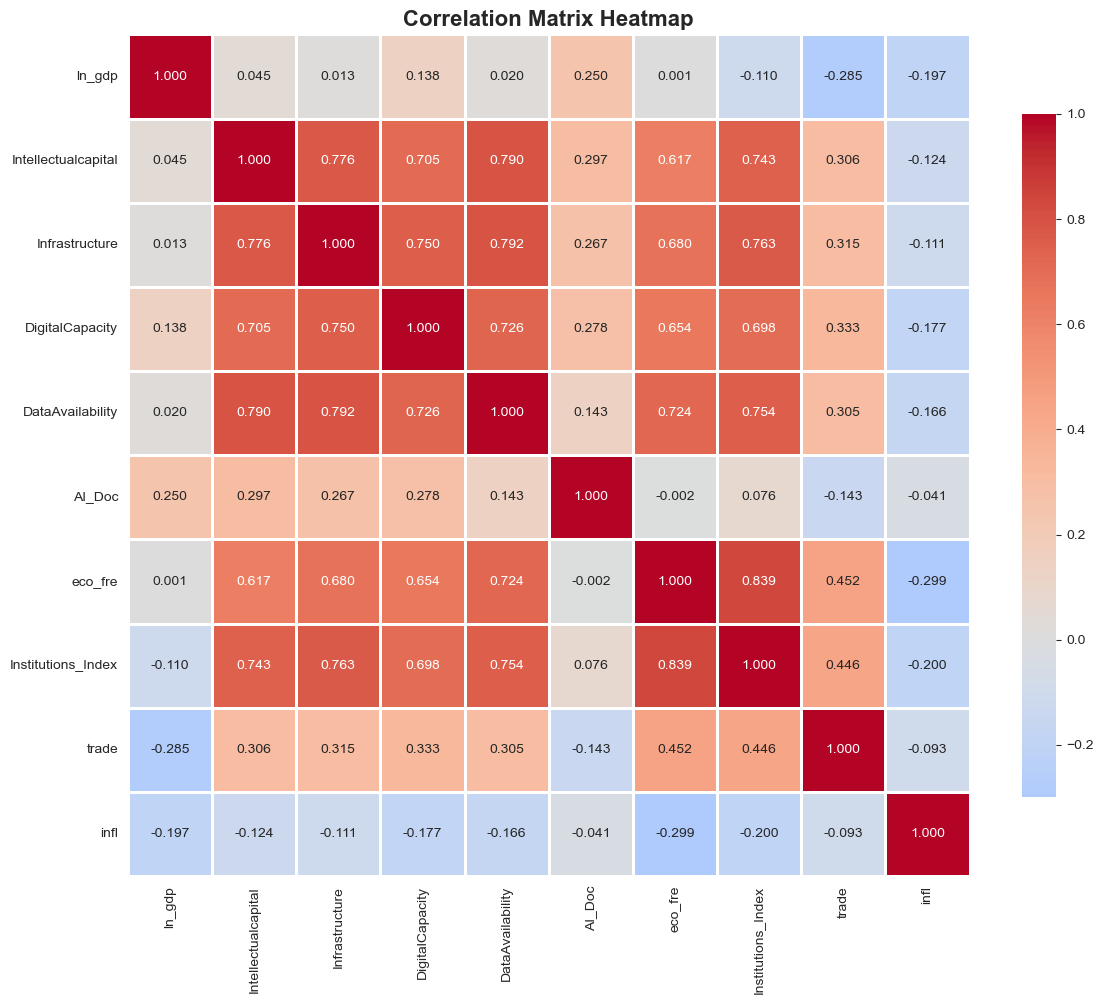

In [110]:
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numeric columns for correlation
numeric_cols = ['ln_gdp', 'Intellectualcapital', 'Infrastructure', 'DigitalCapacity',
                'DataAvailability', 'AI_Doc', 'eco_fre', 'Institutions_Index', 
                'trade','infl']

corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

print("\n" + "="*80)
print("Correlation with ln_gdp (sorted):")
print(corr_matrix['ln_gdp'].sort_values(ascending=False))

# Highlight negative correlations
print("\n" + "="*80)
print("NEGATIVE CORRELATIONS WITH ln_gdp:")
negative_corr = corr_matrix['ln_gdp'][corr_matrix['ln_gdp'] < 0].sort_values()
print(negative_corr)

# Visualization: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [111]:
print("\n" + "="*80)
print("COVARIANCE ANALYSIS")
print("="*80)

cov_matrix = df[numeric_cols].cov()
print("\nCovariance Matrix:")
print(cov_matrix)

print("\nCovariance with ln_gdp:")
print(cov_matrix['ln_gdp'].sort_values(ascending=False))



COVARIANCE ANALYSIS

Covariance Matrix:
                          ln_gdp  Intellectualcapital  Infrastructure  \
ln_gdp                 10.128357             1.828975        0.890739   
Intellectualcapital     1.828975           166.344969      213.849953   
Infrastructure          0.890739           213.849953      456.260125   
DigitalCapacity         7.260702           150.414912      265.080929   
DataAvailability        1.202014           191.992155      318.859700   
AI_Doc               3900.574944         18796.563044    27926.413674   
eco_fre                 0.027729            83.509923      152.603980   
Institutions_Index     -0.774776            21.151373       35.949684   
trade                 -51.466405           223.976352      381.764424   
infl                  -35.871654           -91.161037     -135.093231   

                     DigitalCapacity  DataAvailability        AI_Doc  \
ln_gdp                      7.260702          1.202014  3.900575e+03   
Intellectua


TIME SERIES ANALYSIS


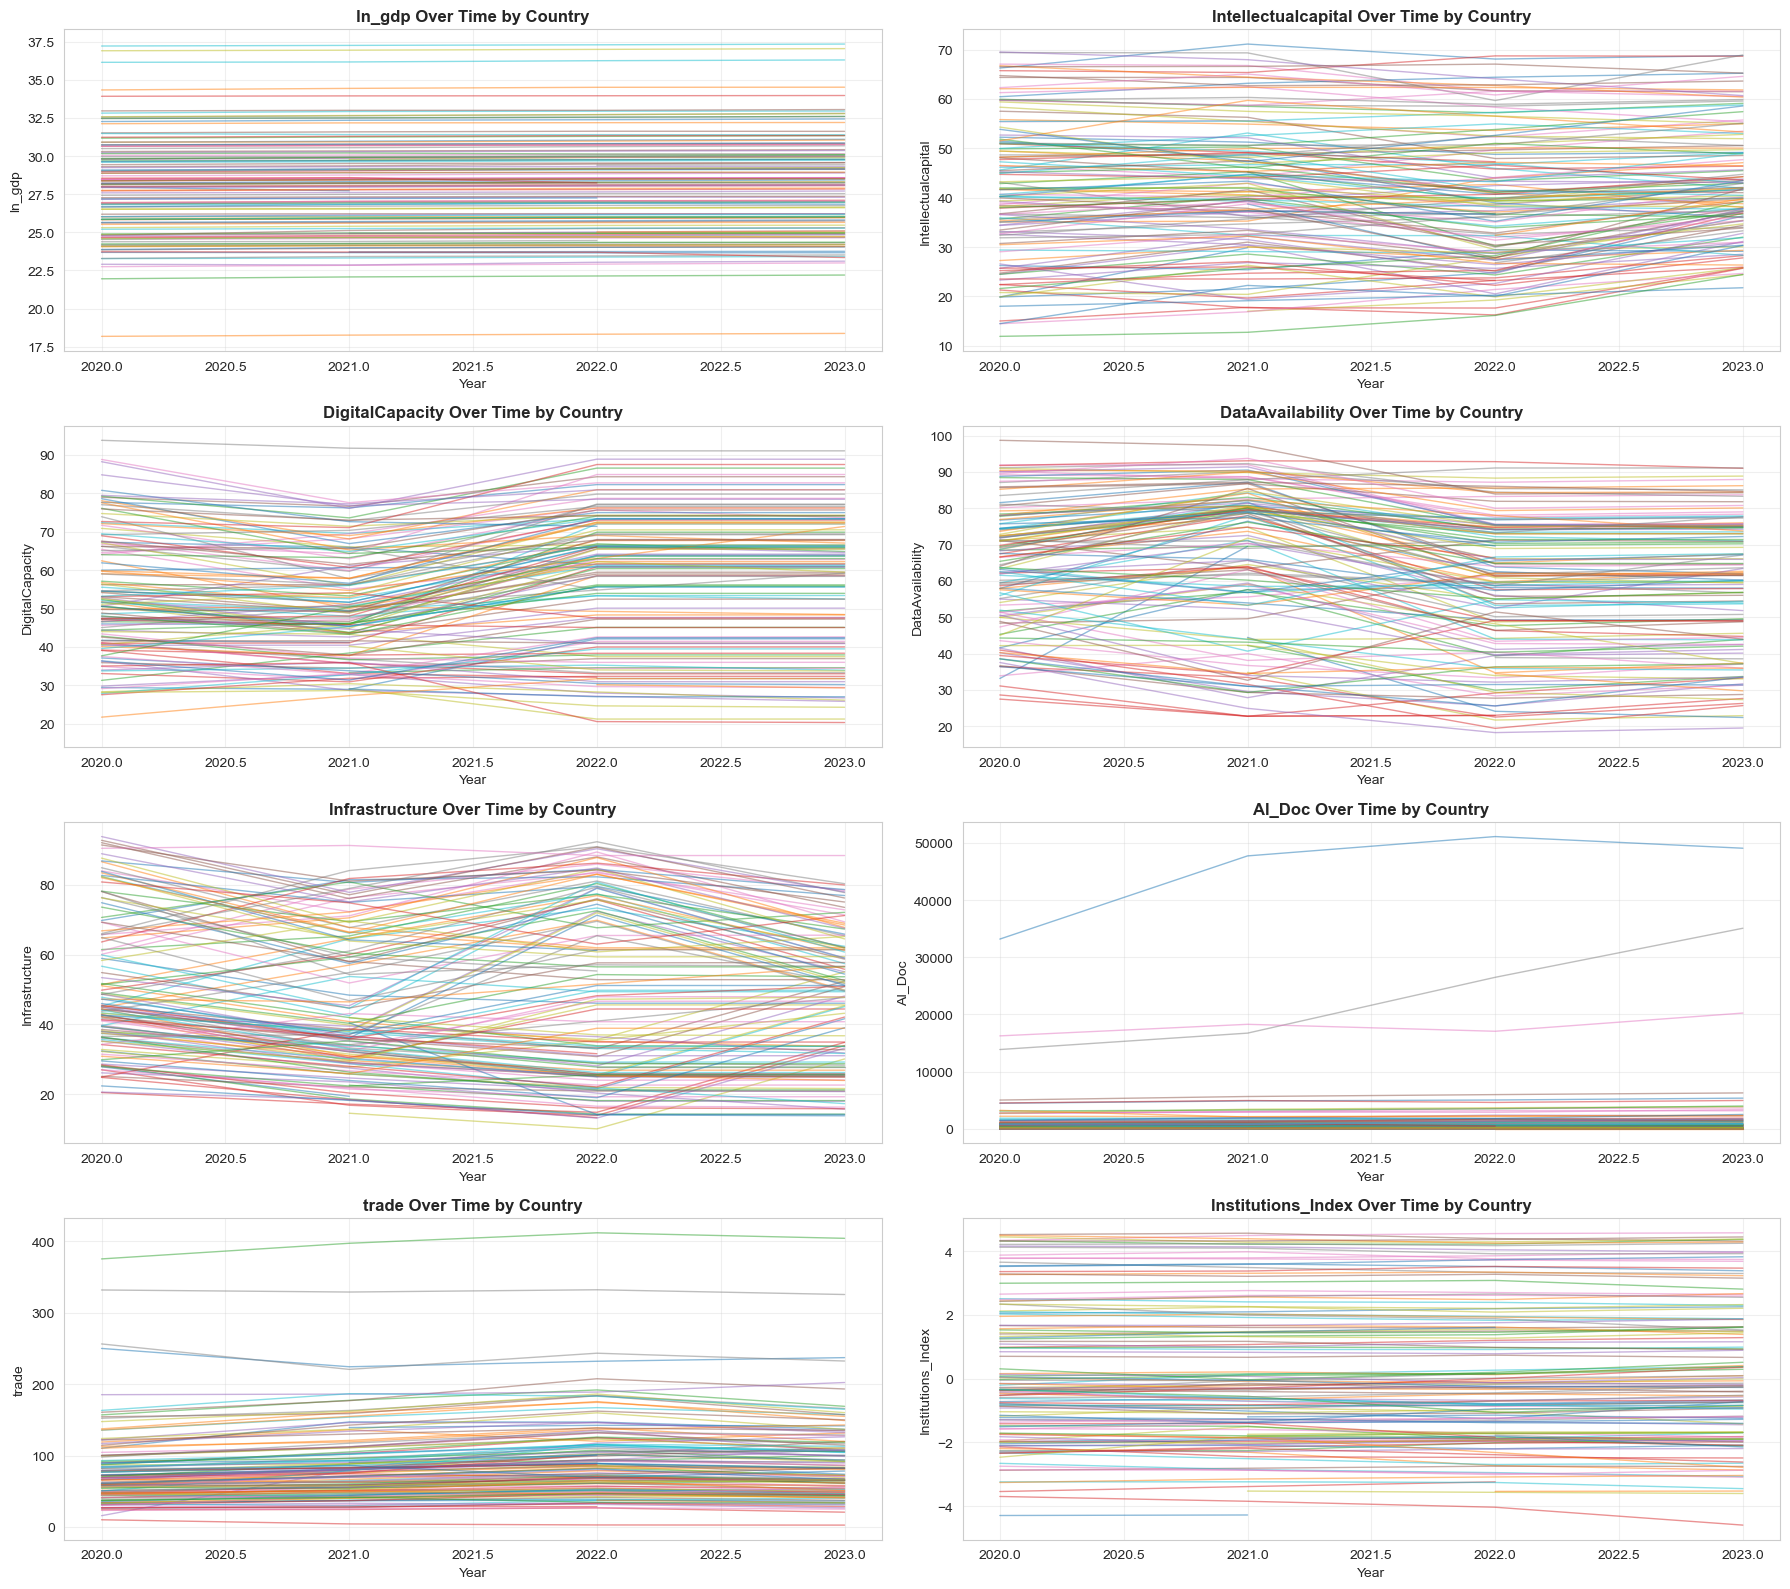

In [112]:
print("\n" + "="*80)
print("TIME SERIES ANALYSIS")
print("="*80)

# Create lagged ln_gdp variable
df_sorted = df.sort_values(['country_name', 'year'])
df_sorted['L_ln_gdp'] = df_sorted.groupby('country_name')['ln_gdp'].shift(1)

# Plot time series for each variable by country
variables = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity', 
             'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade', 'Institutions_Index']

fig, axes = plt.subplots(4, 2, figsize=(18, 16))
axes = axes.ravel()

for idx, var in enumerate(variables):
    ax = axes[idx]
    for country in df['country_name'].unique():
        country_data = df[df['country_name'] == country].sort_values('year')
        ax.plot(country_data['year'], country_data[var], alpha=0.5, linewidth=1)
    
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel(var, fontsize=10)
    ax.set_title(f'{var} Over Time by Country', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


CREATING PAIRPLOT FOR ALL COUNTRIES


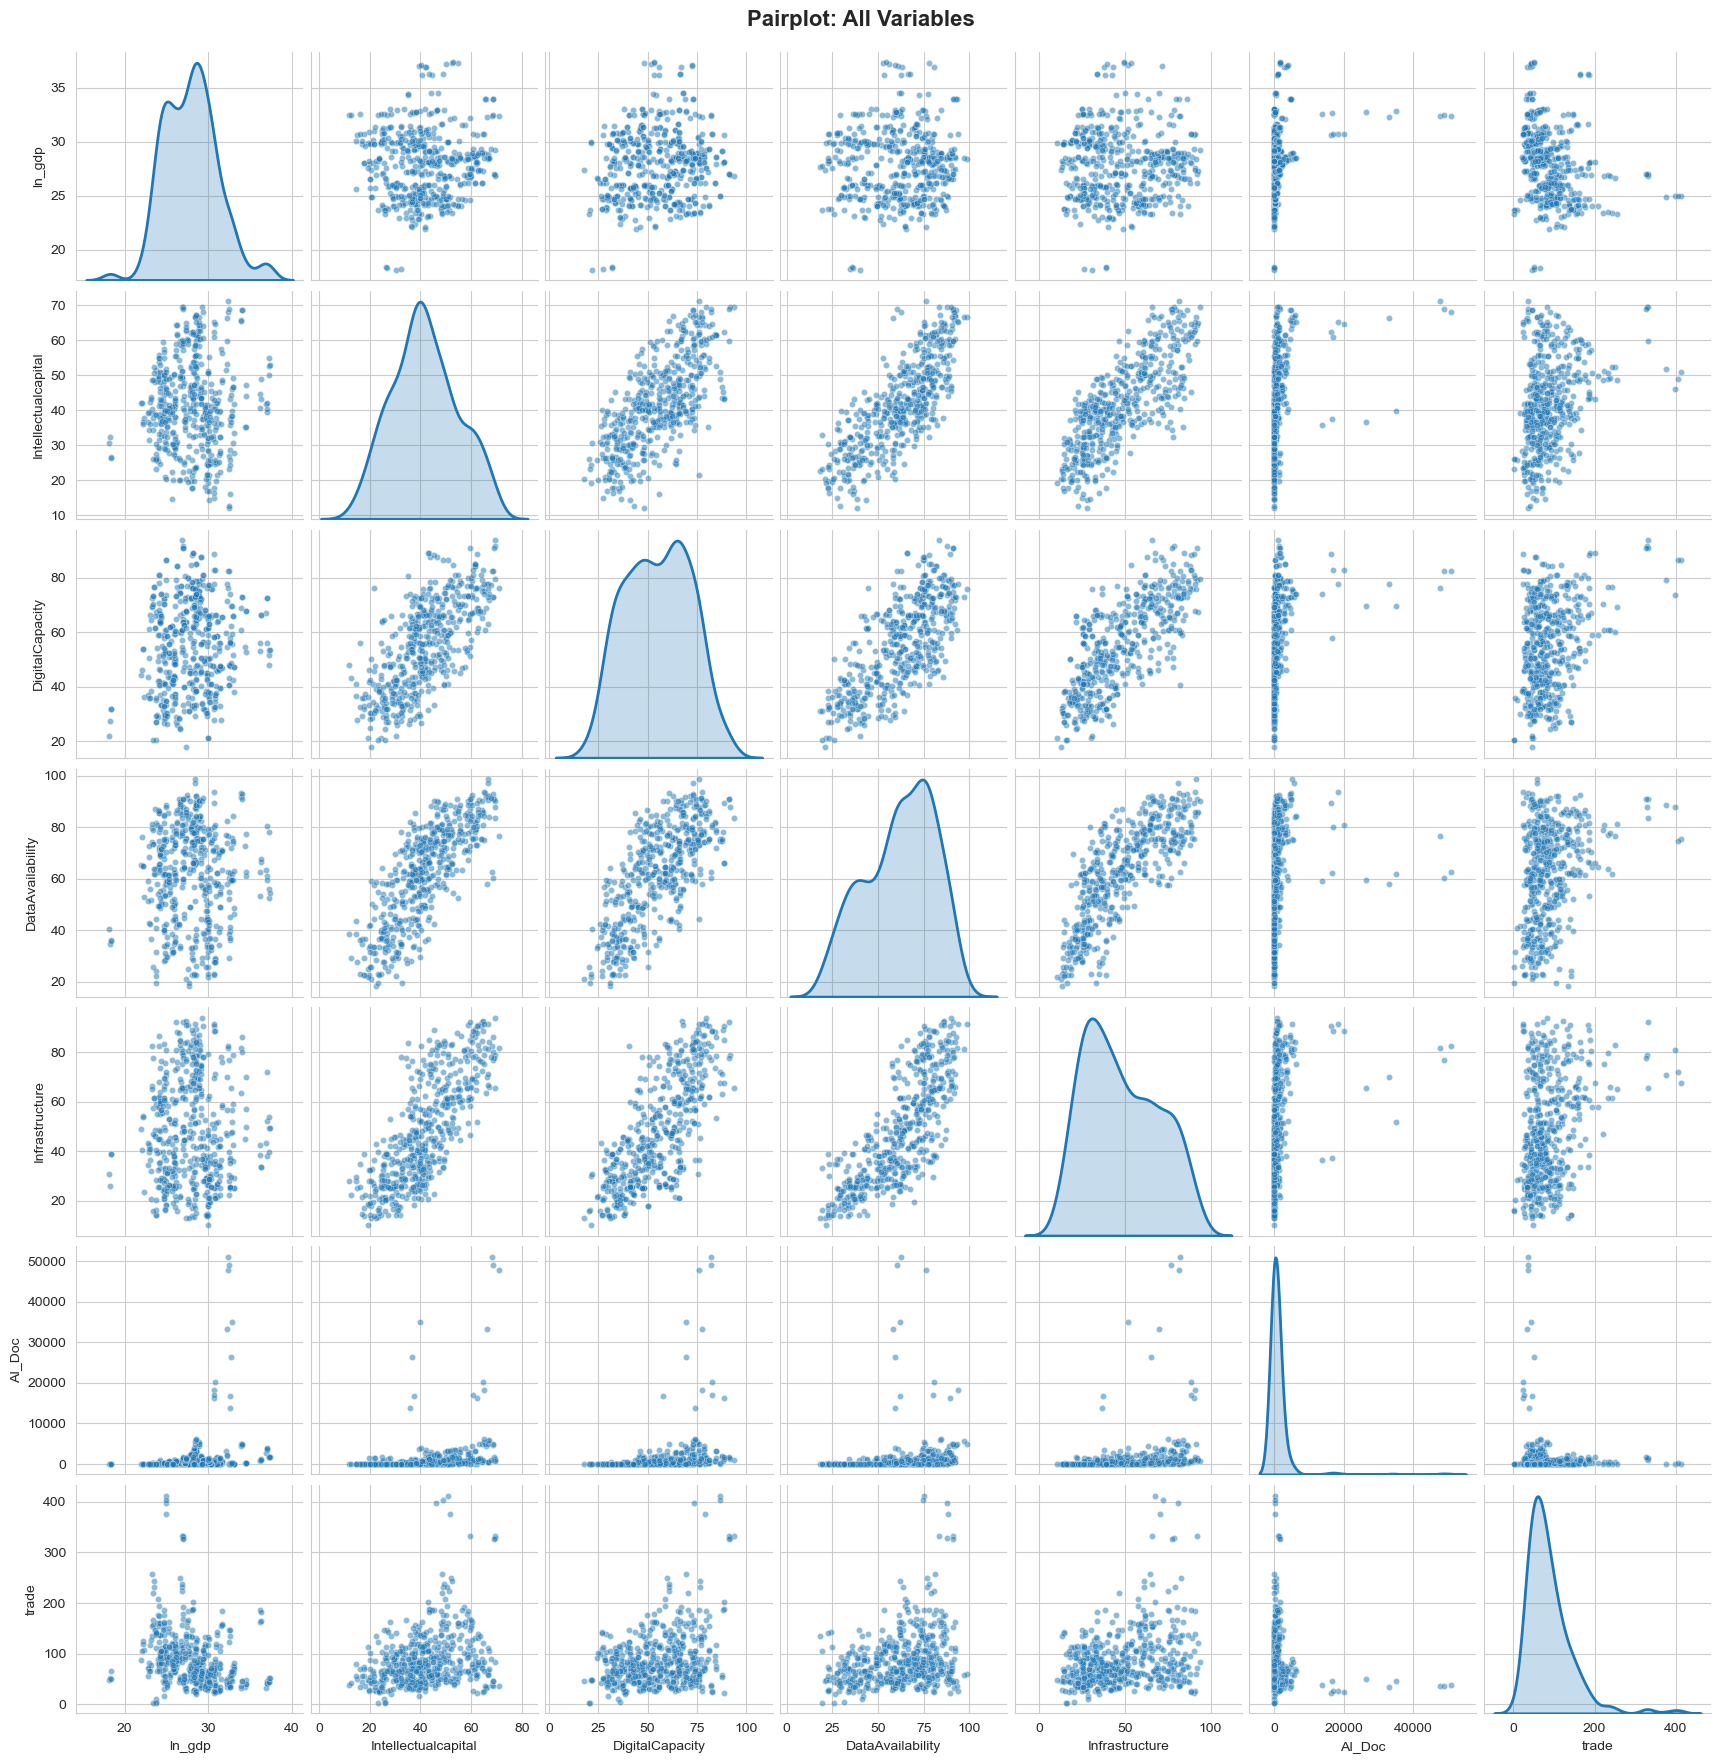

In [113]:
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR ALL COUNTRIES")
print("="*80)

# Select key variables for pairplot
pairplot_vars = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity', 
                 'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade']

# Create pairplot
g = sns.pairplot(df[pairplot_vars + ['country_name']], 
                 diag_kind='kde', 
                 height=2.5,
                 plot_kws={'alpha': 0.5, 's': 20},
                 diag_kws={'linewidth': 2})

g.fig.suptitle('Pairplot: All Variables', y=1.01, fontsize=16, fontweight='bold')
plt.show()


CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED

Top 20 Countries (Highest avg gdp):
country_name
Mexico                30.796435
Mongolia              30.969796
Bangladesh            31.006847
Costa Rica            31.266016
Pakistan              31.305032
Lebanon               31.424222
Hungary               31.589920
Russian Federation    32.168044
China                 32.358732
Cambodia              32.527681
Uganda                32.531340
India                 32.679611
Uzbekistan            32.684593
Chile                 32.910247
Paraguay              33.004654
Japan                 33.950271
Colombia              34.451981
Viet Nam              36.221371
Indonesia             36.975369
Iran                  37.281709
Name: ln_gdp, dtype: float64

Bottom 20 Countries (Lowest avg gdp):
country_name
Zimbabwe                  18.279498
Montenegro                22.089521
Belize                    22.357084
Tajikistan                22.872178
Fiji                      22

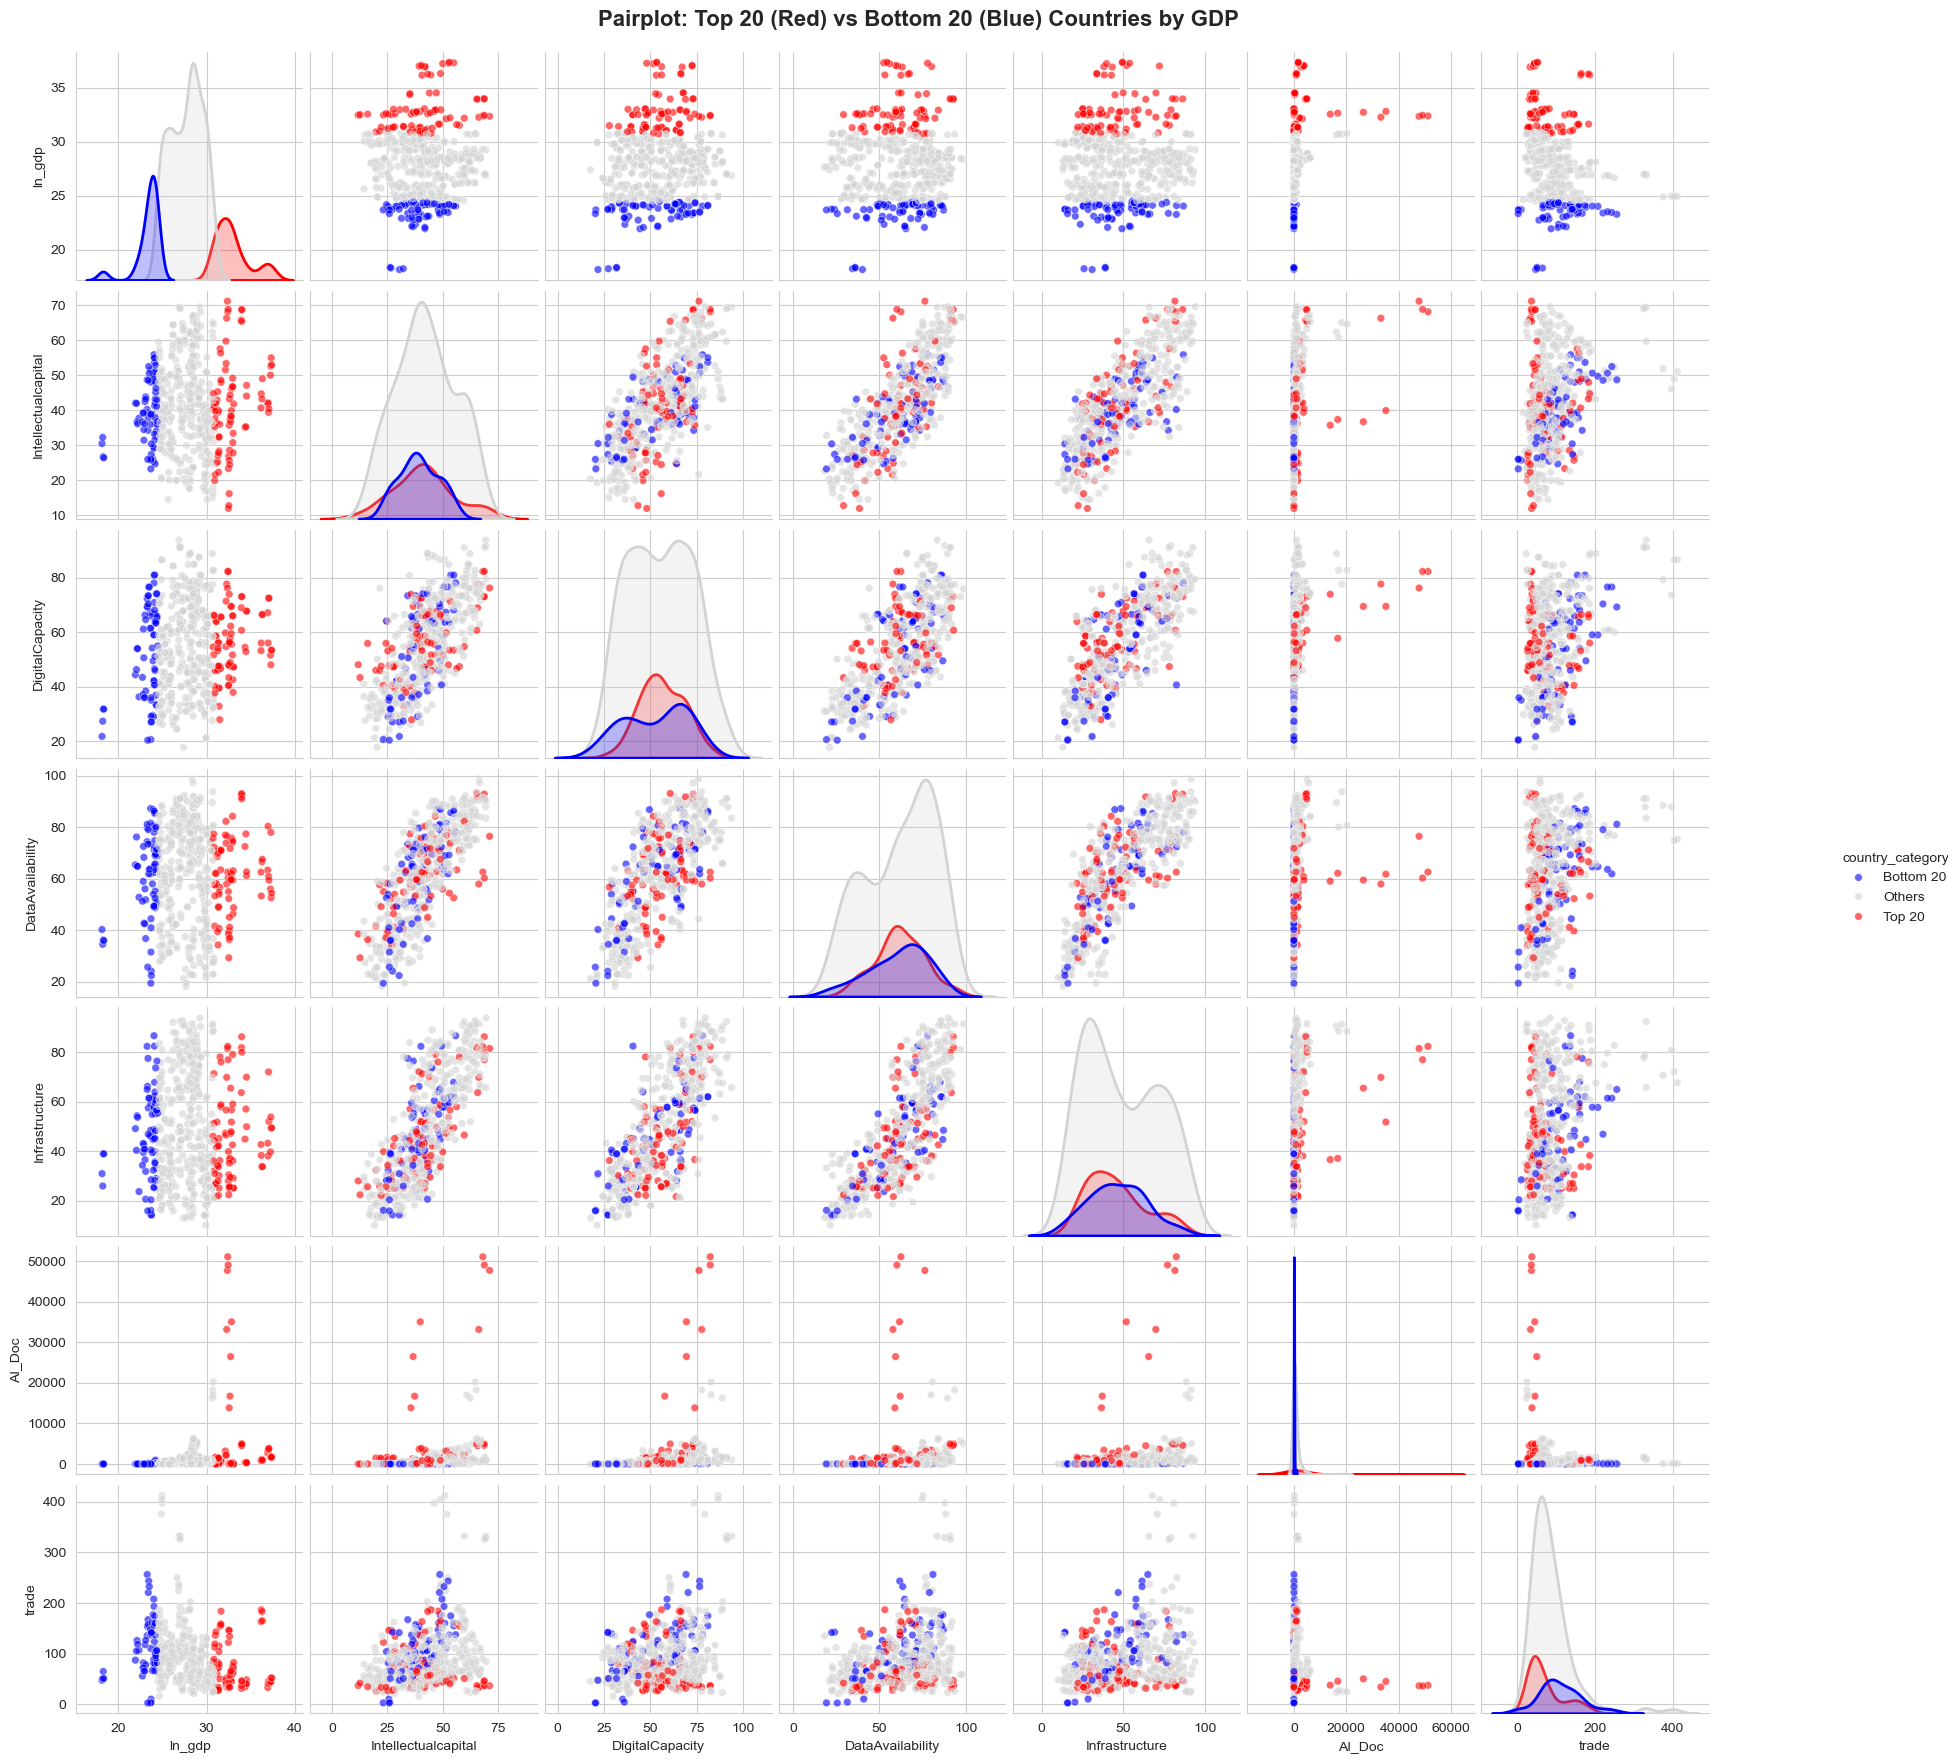

In [114]:
print("\n" + "="*80)
print("CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED")
print("="*80)

# Calculate average ln_gdp per country
avg_gdp = df.groupby('country_name')['ln_gdp'].mean().sort_values()

# Get top 10 and bottom 10 countries
bottom_20 = avg_gdp.head(20).index.tolist()
top_20 = avg_gdp.tail(20).index.tolist()

print("\nTop 20 Countries (Highest avg gdp):")
print(avg_gdp.tail(20))

print("\nBottom 20 Countries (Lowest avg gdp):")
print(avg_gdp.head(20))

# Create category column
def categorize_country(country):
    if country in top_20:
        return 'Top 20'
    elif country in bottom_20:
        return 'Bottom 20'
    else:
        return 'Others'

df['country_category'] = df['country_name'].apply(categorize_country)

# Create pairplot with highlighted categories
g2 = sns.pairplot(df[pairplot_vars + ['country_category']], 
                  hue='country_category',
                  hue_order=['Bottom 20', 'Others', 'Top 20'],
                  palette={'Top 20': 'red', 'Bottom 20': 'blue', 'Others': 'lightgray'},
                  diag_kind='kde',
                  height=2.5,
                  plot_kws={'alpha': 0.6, 's': 30},
                  diag_kws={'linewidth': 2})

g2.fig.suptitle('Pairplot: Top 20 (Red) vs Bottom 20 (Blue) Countries by GDP', 
                y=1.01, fontsize=16, fontweight='bold')
g2._legend.set_bbox_to_anchor((1.05, 0.5))
plt.show()



CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED

Top 10 Countries (Highest AI_Doc):
country_name
Australia          12000.0
Canada             13007.0
Indonesia          13726.0
Italy              13915.0
Japan              19061.0
Germany            19779.0
United Kingdom     22966.0
United States      71838.0
India              92171.0
China             181065.0
Name: AI_Doc, dtype: float64

Bottom 10 Countries (Lowest Ai_Doc):
country_name
Central African Republic    1.0
Solomon Islands             1.0
Belize                      1.0
Togo                        4.0
Burundi                     4.0
Lesotho                     5.0
Gambia                      6.0
Sierra Leone                6.0
Nicaragua                   6.0
Chad                        6.0
Name: AI_Doc, dtype: float64


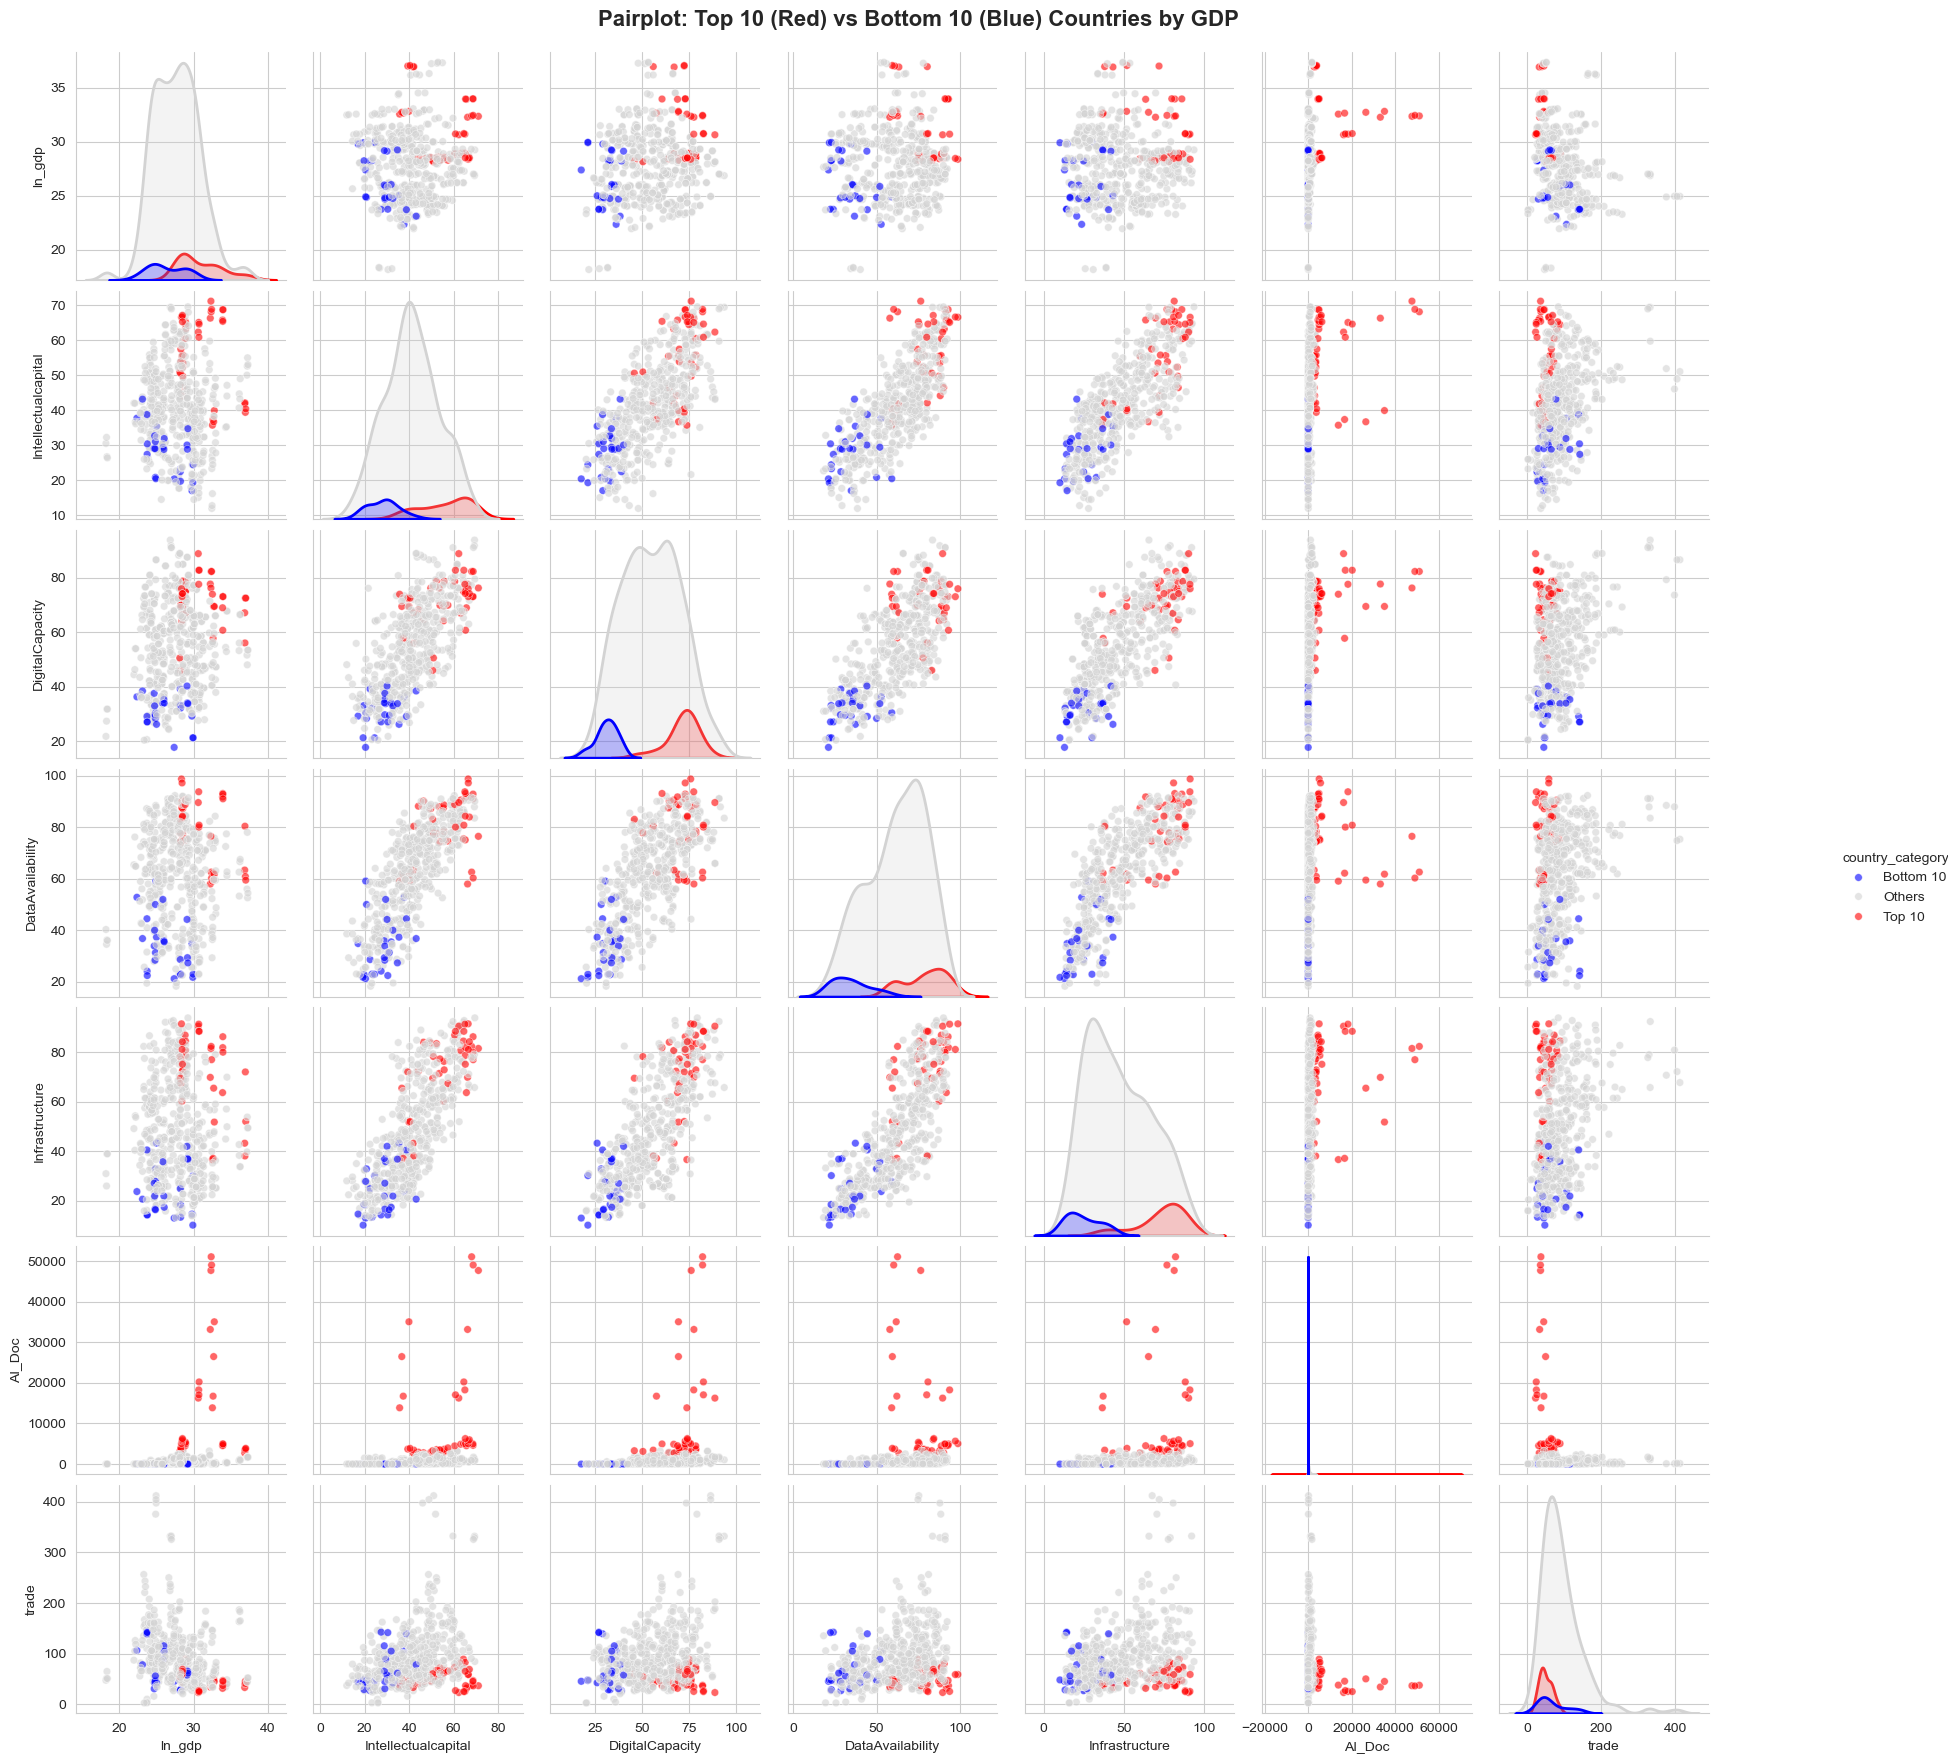

In [115]:
print("\n" + "="*80)
print("CREATING PAIRPLOT WITH TOP/BOTTOM COUNTRIES HIGHLIGHTED")
print("="*80)

# Calculate average AI_Doc per country
sum_AIdoc = df.groupby('country_name')['AI_Doc'].sum().sort_values()

# Get top 10 and bottom 10 countries
bottom_10 = sum_AIdoc.head(10).index.tolist()
top_10 = sum_AIdoc.tail(10).index.tolist()

print("\nTop 10 Countries (Highest AI_Doc):")
print(sum_AIdoc.tail(10))

print("\nBottom 10 Countries (Lowest Ai_Doc):")
print(sum_AIdoc.head(10))

# Create category column
def categorize_country(country):
    if country in top_10:
        return 'Top 10'
    elif country in bottom_10:
        return 'Bottom 10'
    else:
        return 'Others'

df['country_category'] = df['country_name'].apply(categorize_country)

# Create pairplot with highlighted categories
g2 = sns.pairplot(df[pairplot_vars + ['country_category']], 
                  hue='country_category',
                  hue_order=['Bottom 10', 'Others', 'Top 10'],
                  palette={'Top 10': 'red', 'Bottom 10': 'blue', 'Others': 'lightgray'},
                  diag_kind='kde',
                  height=2.5,
                  plot_kws={'alpha': 0.6, 's': 30},
                  diag_kws={'linewidth': 2})

g2.fig.suptitle('Pairplot: Top 10 (Red) vs Bottom 10 (Blue) Countries by GDP', 
                y=1.01, fontsize=16, fontweight='bold')
g2._legend.set_bbox_to_anchor((1.05, 0.5))
plt.show()




CREATING PAIRPLOT FOR TOP 10 COUNTRIES (Highest AI_Doc)


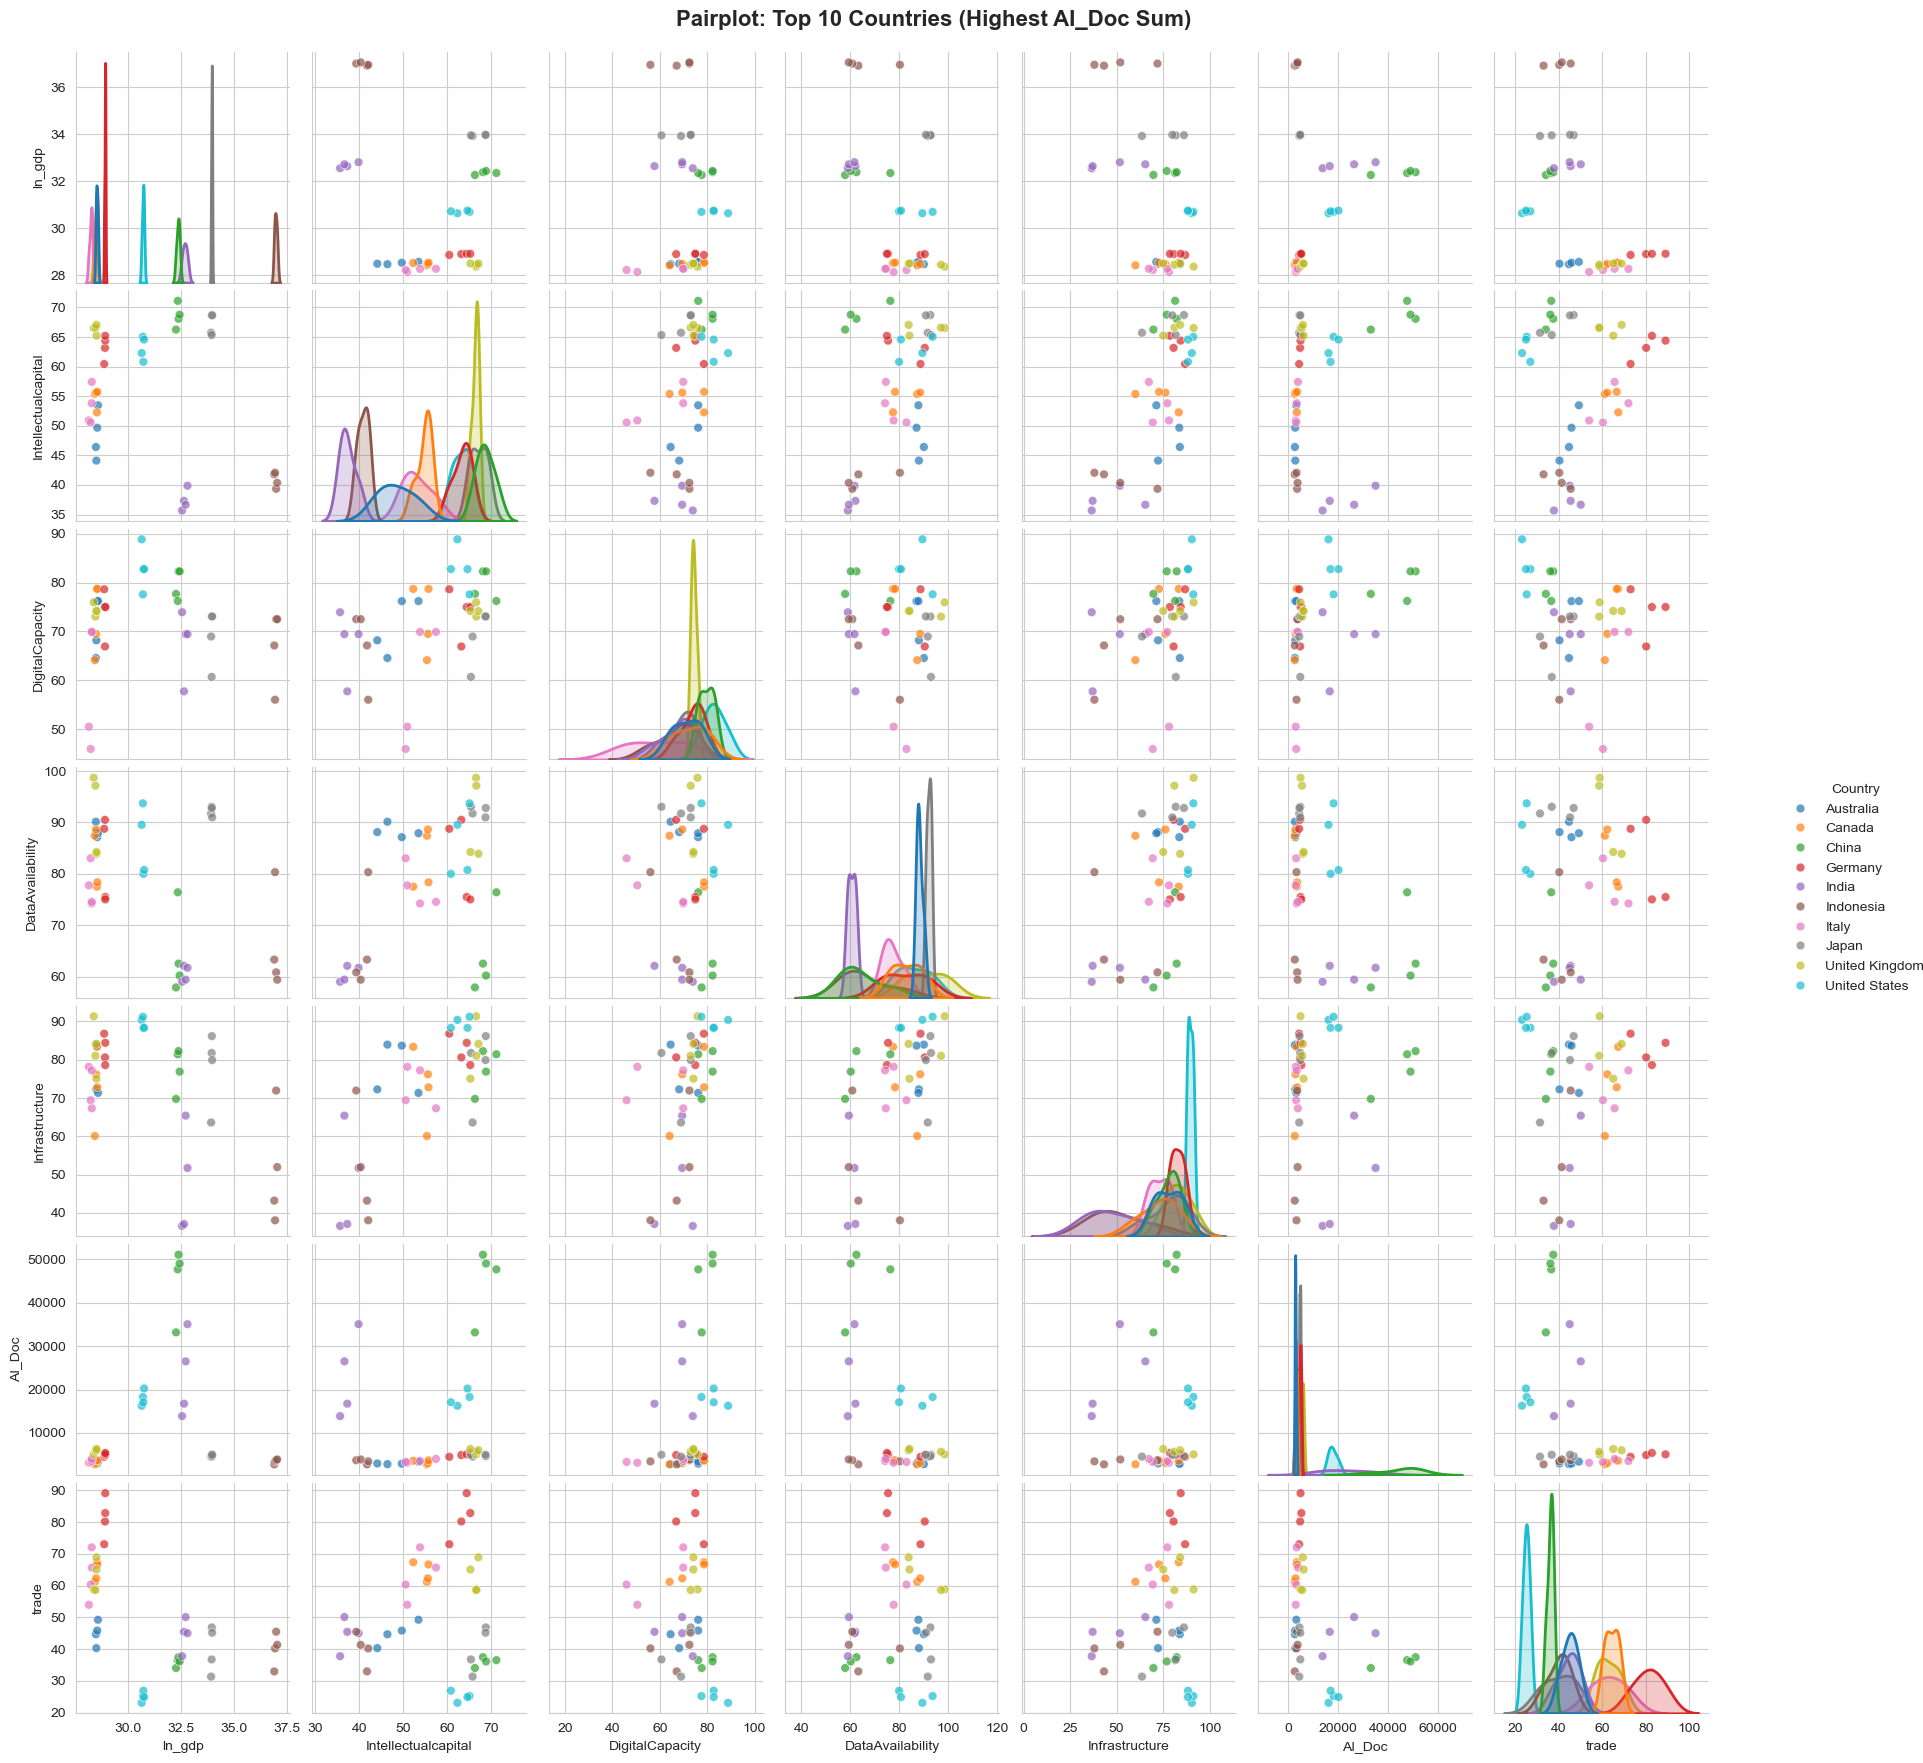


CREATING PAIRPLOT FOR BOTTOM 10 COUNTRIES (Lowest AI_Doc)


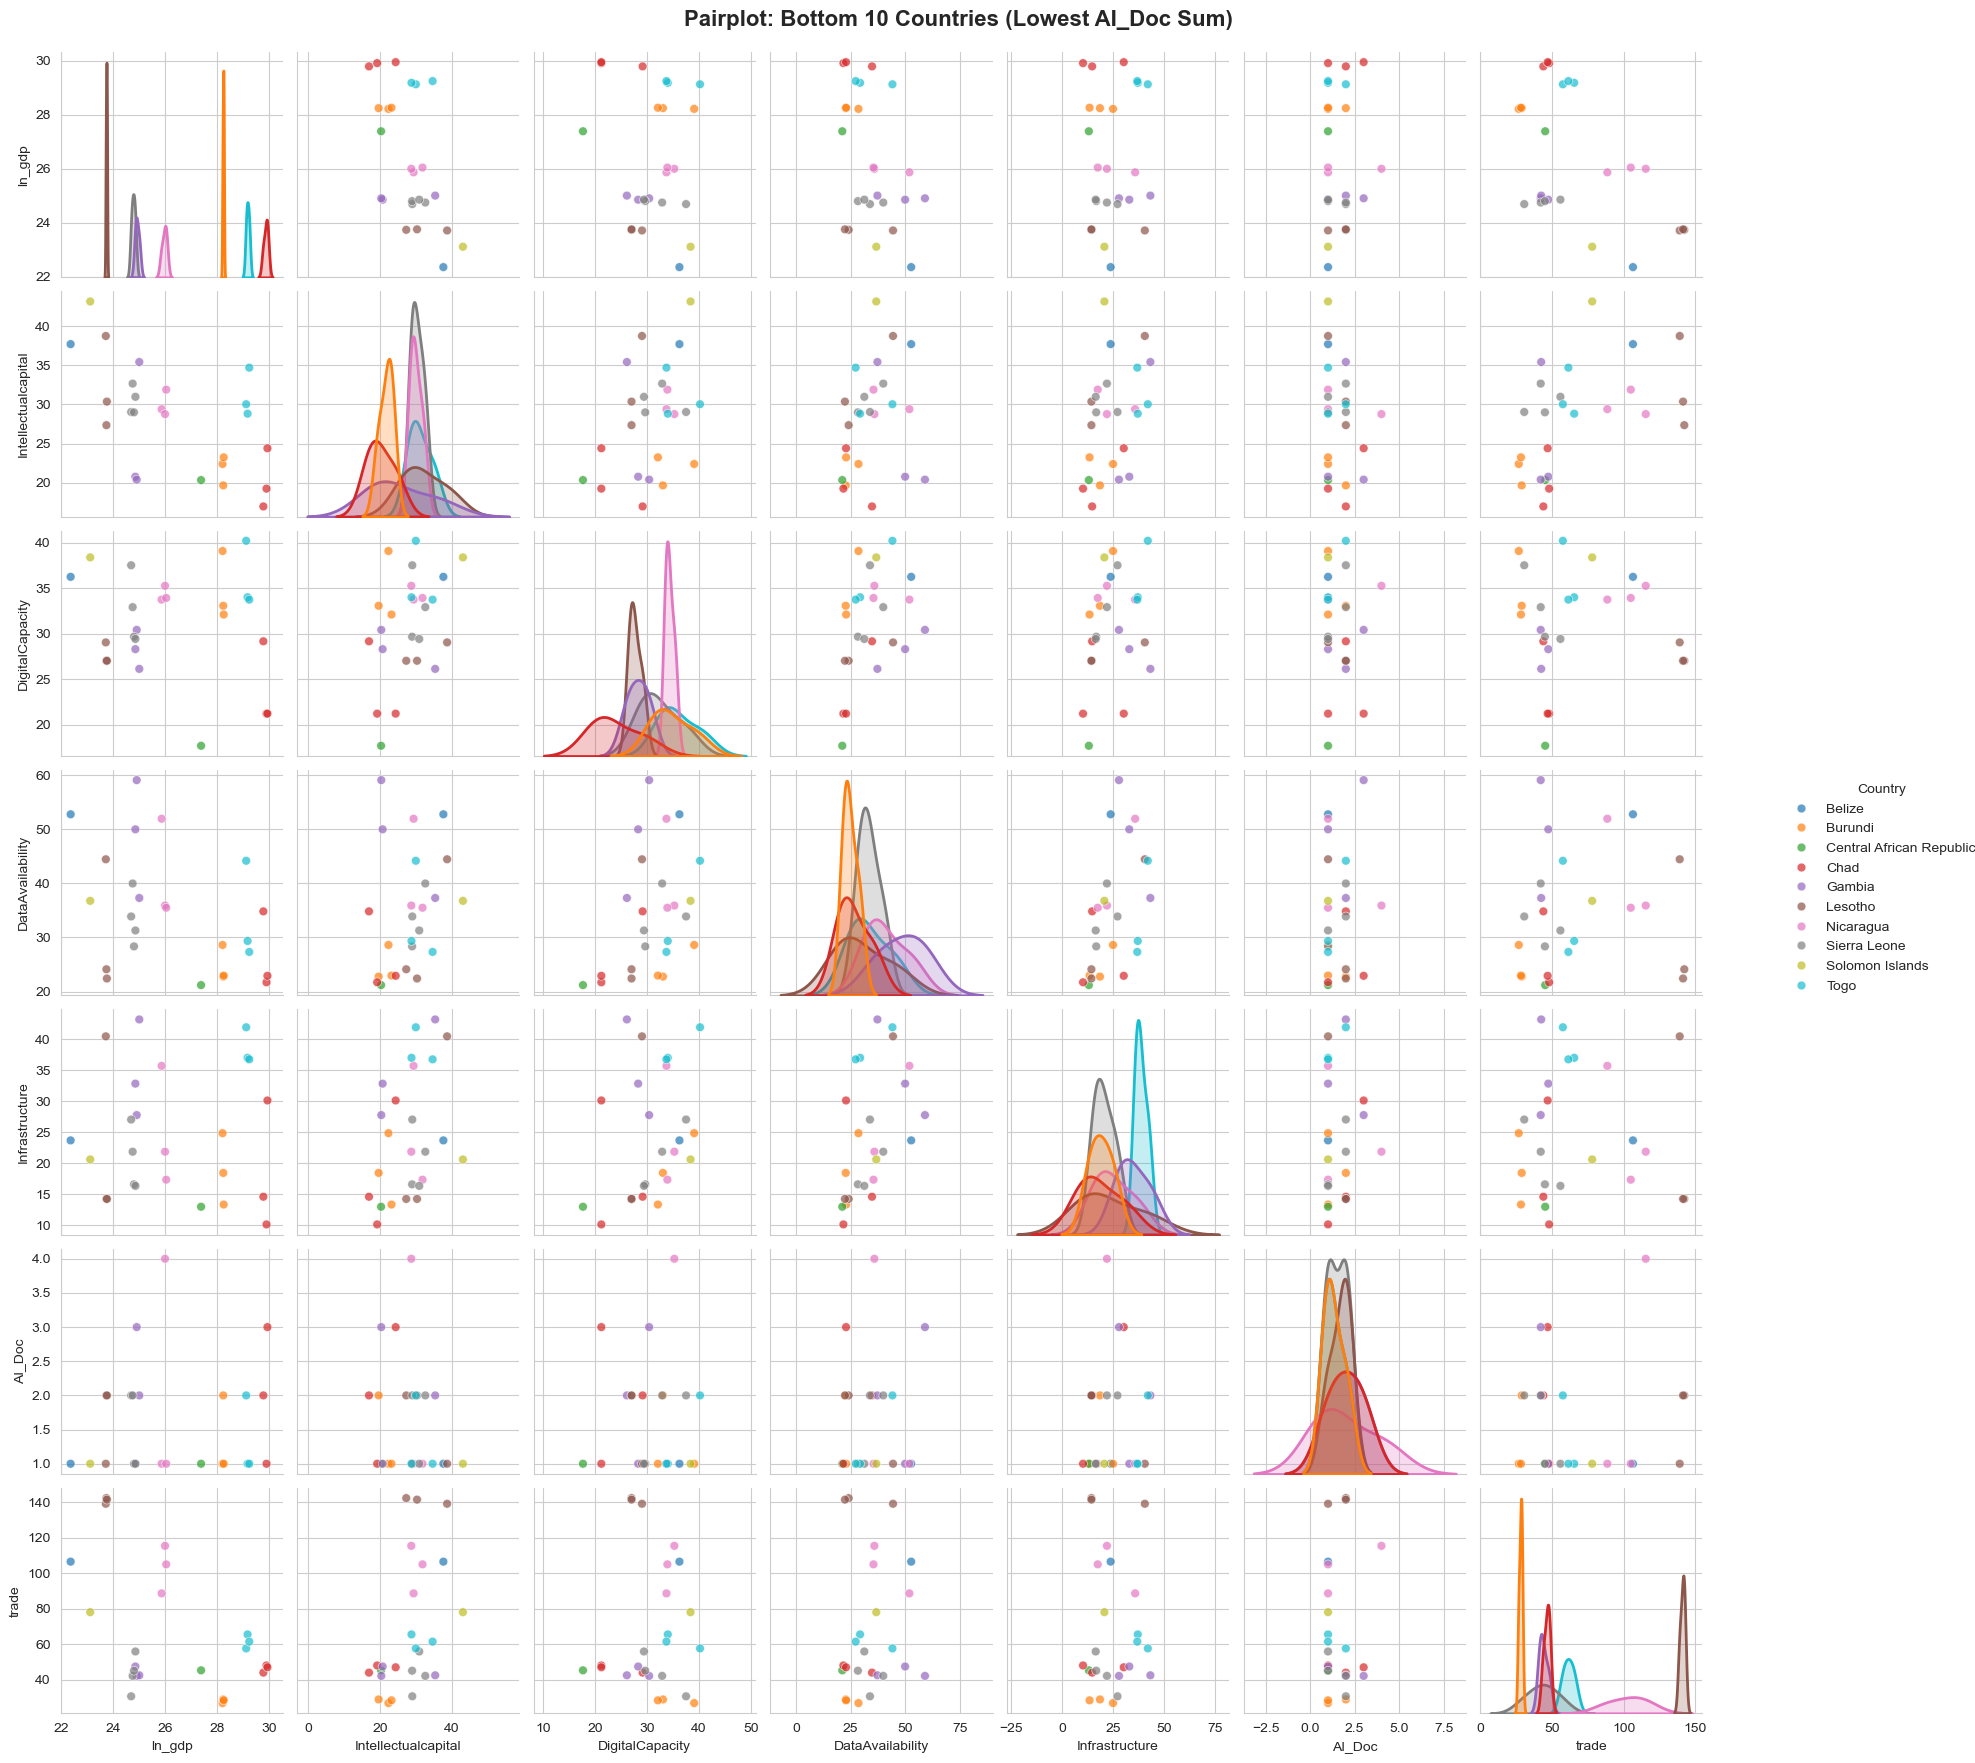

In [116]:
# ============================================================================
# 6A. SEPARATE PAIRPLOT FOR TOP 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR TOP 10 COUNTRIES (Highest AI_Doc)")
print("="*80)

# Filter data for top 10 countries
df_top10 = df[df['country_category'] == 'Top 10'].copy()

# Create pairplot for top 10
g_top = sns.pairplot(df_top10[pairplot_vars + ['country_name']], 
                     hue='country_name',
                     diag_kind='kde',
                     height=2.5,
                     plot_kws={'alpha': 0.7, 's': 40},
                     diag_kws={'linewidth': 2},
                     palette='tab10')

g_top.fig.suptitle('Pairplot: Top 10 Countries (Highest AI_Doc Sum)', 
                   y=1.01, fontsize=16, fontweight='bold')
g_top._legend.set_bbox_to_anchor((1.02, 0.5))
g_top._legend.set_title('Country')
plt.show()

# ============================================================================
# 6B. SEPARATE PAIRPLOT FOR BOTTOM 10 COUNTRIES
# ============================================================================
print("\n" + "="*80)
print("CREATING PAIRPLOT FOR BOTTOM 10 COUNTRIES (Lowest AI_Doc)")
print("="*80)

# Filter data for bottom 10 countries
df_bottom10 = df[df['country_category'] == 'Bottom 10'].copy()

# Create pairplot for bottom 10
g_bottom = sns.pairplot(df_bottom10[pairplot_vars + ['country_name']], 
                        hue='country_name',
                        diag_kind='kde',
                        height=2.5,
                        plot_kws={'alpha': 0.7, 's': 40},
                        diag_kws={'linewidth': 2},
                        palette='tab10')

g_bottom.fig.suptitle('Pairplot: Bottom 10 Countries (Lowest AI_Doc Sum)', 
                      y=1.01, fontsize=16, fontweight='bold')
g_bottom._legend.set_bbox_to_anchor((1.02, 0.5))
g_bottom._legend.set_title('Country')
plt.show()


FOCUSED ANALYSIS: DataAvailability & Infrastructure vs ln_gdp


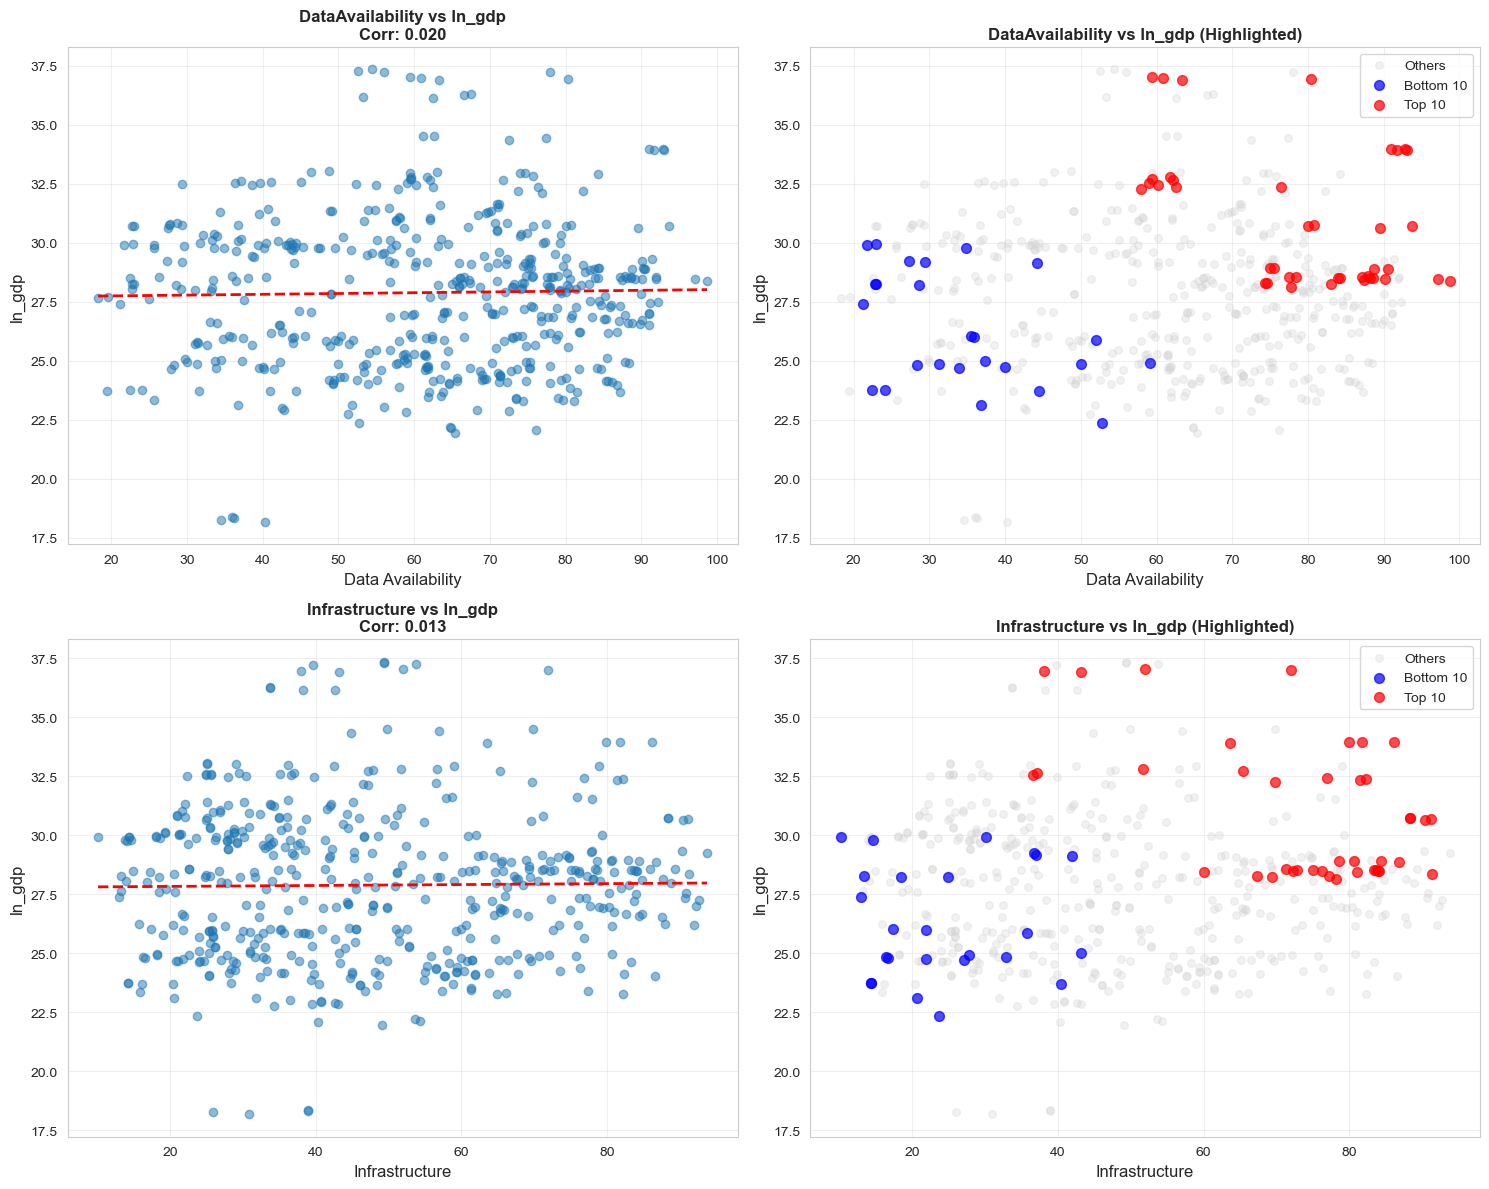


STATISTICAL TESTS FOR NEGATIVE CORRELATIONS

DataAvailability vs ln_gdp:
  Pearson r: 0.0200
  P-value: 6.5492e-01
  Significant: No

Infrastructure vs ln_gdp:
  Pearson r: 0.0131
  P-value: 7.7008e-01
  Significant: No


In [117]:
print("\n" + "="*80)
print("FOCUSED ANALYSIS: DataAvailability & Infrastructure vs ln_gdp")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# DataAvailability vs ln_gdp - All countries
axes[0, 0].scatter(df['DataAvailability'], df['ln_gdp'], alpha=0.5)
z = np.polyfit(df['DataAvailability'].dropna(), 
               df.loc[df['DataAvailability'].notna(), 'ln_gdp'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['DataAvailability'].sort_values(), 
                p(df['DataAvailability'].sort_values()), "r--", linewidth=2)
axes[0, 0].set_xlabel('Data Availability', fontsize=12)
axes[0, 0].set_ylabel('ln_gdp', fontsize=12)
axes[0, 0].set_title(f'DataAvailability vs ln_gdp\nCorr: {df["DataAvailability"].corr(df["ln_gdp"]):.3f}',
                     fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# DataAvailability vs ln_gdp - Highlighted
scatter1 = axes[0, 1].scatter(df[df['country_category']=='Others']['DataAvailability'], 
                              df[df['country_category']=='Others']['ln_gdp'], 
                              alpha=0.3, c='lightgray', s=30, label='Others')
scatter2 = axes[0, 1].scatter(df[df['country_category']=='Bottom 10']['DataAvailability'], 
                              df[df['country_category']=='Bottom 10']['ln_gdp'], 
                              alpha=0.7, c='blue', s=50, label='Bottom 10')
scatter3 = axes[0, 1].scatter(df[df['country_category']=='Top 10']['DataAvailability'], 
                              df[df['country_category']=='Top 10']['ln_gdp'], 
                              alpha=0.7, c='red', s=50, label='Top 10')
axes[0, 1].set_xlabel('Data Availability', fontsize=12)
axes[0, 1].set_ylabel('ln_gdp', fontsize=12)
axes[0, 1].set_title('DataAvailability vs ln_gdp (Highlighted)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Infrastructure vs ln_gdp - All countries
axes[1, 0].scatter(df['Infrastructure'], df['ln_gdp'], alpha=0.5)
z = np.polyfit(df['Infrastructure'].dropna(), 
               df.loc[df['Infrastructure'].notna(), 'ln_gdp'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['Infrastructure'].sort_values(), 
                p(df['Infrastructure'].sort_values()), "r--", linewidth=2)
axes[1, 0].set_xlabel('Infrastructure', fontsize=12)
axes[1, 0].set_ylabel('ln_gdp', fontsize=12)
axes[1, 0].set_title(f'Infrastructure vs ln_gdp\nCorr: {df["Infrastructure"].corr(df["ln_gdp"]):.3f}',
                     fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Infrastructure vs ln_gdp - Highlighted
scatter1 = axes[1, 1].scatter(df[df['country_category']=='Others']['Infrastructure'], 
                              df[df['country_category']=='Others']['ln_gdp'], 
                              alpha=0.3, c='lightgray', s=30, label='Others')
scatter2 = axes[1, 1].scatter(df[df['country_category']=='Bottom 10']['Infrastructure'], 
                              df[df['country_category']=='Bottom 10']['ln_gdp'], 
                              alpha=0.7, c='blue', s=50, label='Bottom 10')
scatter3 = axes[1, 1].scatter(df[df['country_category']=='Top 10']['Infrastructure'], 
                              df[df['country_category']=='Top 10']['ln_gdp'], 
                              alpha=0.7, c='red', s=50, label='Top 10')
axes[1, 1].set_xlabel('Infrastructure', fontsize=12)
axes[1, 1].set_ylabel('ln_gdp', fontsize=12)
axes[1, 1].set_title('Infrastructure vs ln_gdp (Highlighted)', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests for negative correlations
print("\n" + "="*80)
print("STATISTICAL TESTS FOR NEGATIVE CORRELATIONS")
print("="*80)

# DataAvailability
pearson_r, p_value = stats.pearsonr(df['DataAvailability'].dropna(), 
                                     df.loc[df['DataAvailability'].notna(), 'ln_gdp'])
print(f"\nDataAvailability vs ln_gdp:")
print(f"  Pearson r: {pearson_r:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Infrastructure
pearson_r, p_value = stats.pearsonr(df['Infrastructure'].dropna(), 
                                     df.loc[df['Infrastructure'].notna(), 'ln_gdp'])
print(f"\nInfrastructure vs ln_gdp:")
print(f"  Pearson r: {pearson_r:.4f}")
print(f"  P-value: {p_value:.4e}")
print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")



CREATING BOX PLOTS


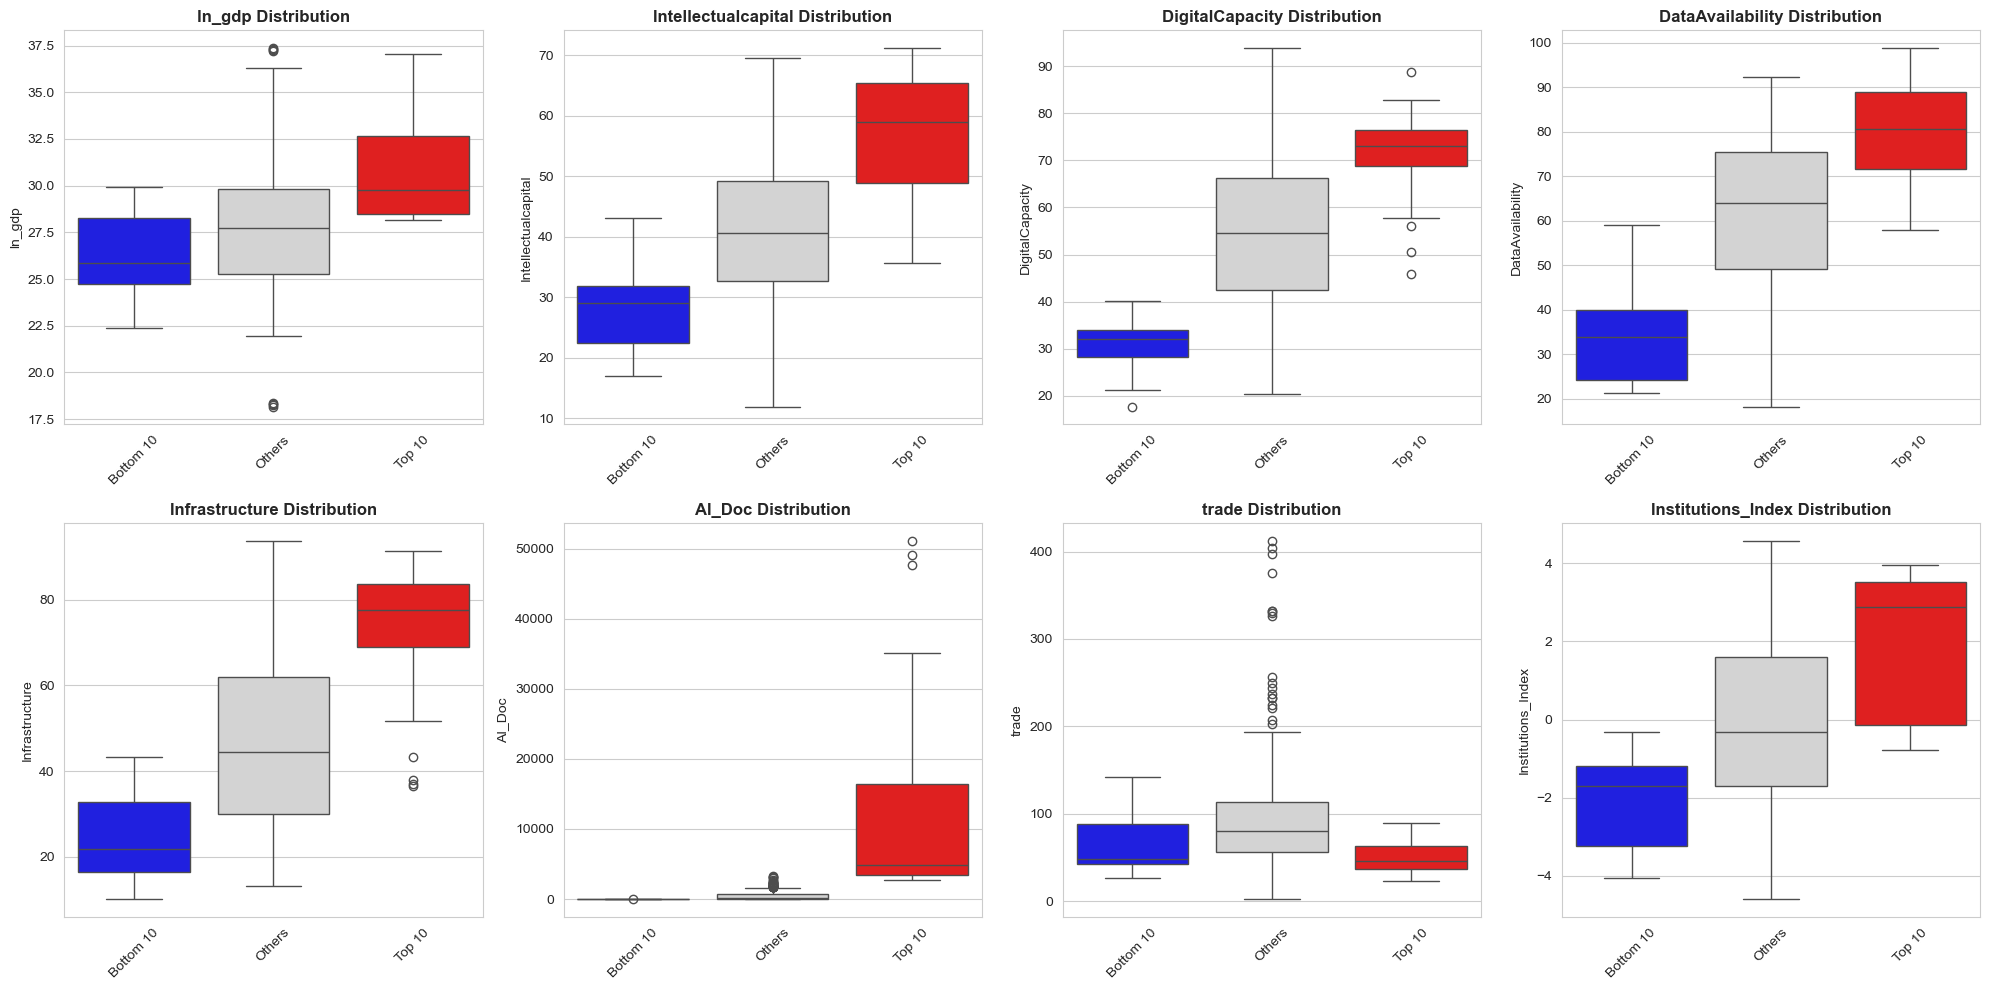


EDA COMPLETE! All visualizations saved.


In [ ]:
print("\n" + "="*80)
print("CREATING BOX PLOTS")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

plot_vars = ['ln_gdp', 'Intellectualcapital', 'DigitalCapacity', 
             'DataAvailability', 'Infrastructure', 'AI_Doc', 'trade', 'Institutions_Index']

for idx, var in enumerate(plot_vars):
    sns.boxplot(data=df, x='country_category', y=var, 
                order=['Bottom 10', 'Others', 'Top 10'],
                palette={'Top 10': 'red', 'Bottom 10': 'blue', 'Others': 'lightgray'},
                ax=axes[idx])
    axes[idx].set_title(f'{var} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
